In [1]:
# 使用的框架paddle
# 相关框架的加载
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import os
import gzip
import json
import random
import numpy as np

In [2]:
# 声明数据集文件位置
datafile = 'mnist .json.gz'
print(f'加载数据从{datafile}')
# 加载json数据文件
data = json.load(gzip.open(datafile))
print('数据集加载完毕')
# 读取到的数据区分训练集，验证集，测试集
train_set, val_set, eval_set = data

# 观察训练集数据
imgs, labels = train_set[0], train_set[1]
print("训练数据集数量: ", len(imgs))

# 观察验证集数量
imgs, labels = val_set[0], val_set[1]
print("验证数据集数量: ", len(imgs))

# 观察测试集数量
imgs, labels = val= eval_set[0], eval_set[1]
print("测试数据集数量: ", len(imgs))
print(len(imgs[0]))

加载数据从mnist .json.gz
数据集加载完毕
训练数据集数量:  50000
验证数据集数量:  10000
测试数据集数量:  10000
784


In [3]:
# 数据加载
def load_data(mode='train', batch_size = 100):
    """ 
    加载数据函数
    传入两个参数mode,batch_size
    """
    datafile = './mnist .json.gz'
    print(f'加载数据从{datafile}')
    # 加载json数据文件
    data = json.load(gzip.open(datafile))
    print(f'加载数据集完毕')

    # 根据输入的参数进行数据的划分
    train_set, val_set, eval_set = data
    if mode == 'train':
        imgs, labels = train_set[0], train_set[1]
    elif mode == 'valid':
        imgs, labels = val_set[0], val_set[1]
    elif mode == 'eval':
        imgs, labels = eval_set[0], eval_set[1]
    else:
        raise Exception("mode 参数必须为['train','valid', 'eval']")
    print(f"加载的数据集数量{len(imgs)}")

    # 获取数据集的长度
    imgs_length = len(imgs)

    # 给每一条数据编号
    index_list = list(range(imgs_length))
    BATCHSIZE = batch_size

    # 定义数据生成器
    def data_generator():
        if mode == 'train':
            # 训练模式下要打乱数据
            random.shuffle(index_list)
        imgs_list = []
        labels_list = []
        for i in index_list:
            # 处理数据
            img = np.array(imgs[i]).astype('float32')
            label = np.array(labels[i]).astype('float32')
            imgs_list.append(img)
            labels_list.append(label)
            if len(imgs_list) == BATCHSIZE:
                # 获得一个BATCHSIZE的数据
                yield np.array(imgs_list),np.array(labels_list)
                # 数据清空，加载下一批
                imgs_list = []
                labels_list = []
        
        # 对于小于BATCESIZE的
        if len(imgs_list)>0:
            yield np.array(imgs_list), np.array(labels_list)
    return data_generator 

In [4]:
import numpy as np

b = np.zeros((1,100))
print(b)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


In [13]:
# 全连接神经网络的搭建，三层
import numpy as np

class ThreeLayerNetwork(object):
    def __init__(self, input_num, hidden1_num, hidden2_num, output_num):
        # 使用Xavier初始化权重
        self.W1 = np.random.randn(input_num, hidden1_num) / np.sqrt(input_num)
        self.b1 = np.zeros((1, hidden1_num))
        self.W2 = np.random.randn(hidden1_num, hidden2_num) / np.sqrt(hidden1_num)
        self.b2 = np.zeros((1, hidden2_num))
        self.W3 = np.random.randn(hidden2_num, output_num) / np.sqrt(hidden2_num)
        self.b3 = np.zeros((1, output_num))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1 
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        return self.z3

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1-self.sigmoid(x))
    
    def loss2(self, y_pred, y_true):
        error = y_pred - y_true
        num_sample = y_pred.shape[0]
        cost = np.sum(error ** 2)/ num_sample
        return cost
    
    def gradient(self, X, y_pred, y_true):
        m = y_pred.shape[0]
        delta3 = (y_pred - y_true)
        dW3 = np.dot(self.a2.T, delta3) / m
        db3 = np.sum(delta3, axis=0) / m
        delta2 = np.dot(delta3, self.W3.T) * self.sigmoid_derivative(self.z2)
        dW2 = np.dot(self.a1.T, delta2) / m
        db2 = np.sum(delta2,axis=0) / m
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.z1)
        dW1 = np.dot(X.T, delta1) / m
        db1 = np.sum(delta1, axis=0) / m
        return dW1, db1, dW2, db2, dW3, db3

    def update(self, dW1, db1, dW2, db2, dW3, db3, eta):
        self.W1 -= eta * dW1
        self.b1 -= eta * db1
        self.W2 -= eta * dW2
        self.b2 -= eta * db2
        self.W3 -= eta * dW3
        self.b3 -= eta * db3

    def train(self, num_epochs, batch_size=10, eta = 0.01):
        losses = []
        train_loader = load_data('train', batch_size=batch_size)
        for epoch_id in range(num_epochs):
            for batch_id, data in enumerate(train_loader()):
                images, labels = data
                labels = labels.reshape(batch_size, 1)
                # 信号的前向传播
                predicts = self.forward(images)
                # 损失
                cost = self.loss2(predicts, labels)
                # 记录损失
                if batch_id % 200 == 0:
                    losses.append(cost)
                    print(f'epoch{epoch_id}, batch{batch_id}, loss{cost}')
                # 梯度的反向传播
                W1, b1, W2, b2, W3, b3 = self.gradient(images, predicts
                                                       ,labels)
                self.update(W1, b1, W2, b2, W3, b3, eta=eta)

            

                
        return losses
    
    def trainAndvalid(self, num_epochs, batch_size, eta):
        """
        进行超参数的搜索
        """
        train_losses = []
        valid_losses = []

        train_loader = load_data('train', batch_size=batch_size)
        valid_loader = load_data('valid',batch_size=batch_size)
        for epoch_id in range(num_epochs):
            for batch_id, data in enumerate(train_loader()):
                images, labels = data
                labels = labels.reshape(batch_size, 1)
                # 信号的前向传播
                predicts = self.forward(images)
                # 损失
                cost = self.loss2(predicts, labels)
                # 记录损失
                if batch_id % 200 == 0:
                    train_losses.append(cost)
                    print(f'epoch{epoch_id}, batch{batch_id}, train_loss{cost}')
                # 梯度的反向传播
                W1, b1, W2, b2, W3, b3 = self.gradient(images, predicts
                                                       ,labels)
                self.update(W1, b1, W2, b2, W3, b3, eta=eta)

            # 每个epoch结束后进行验证集损失
            valid_loss = 0
            for data in valid_loader():
                valid_imgs, valid_labels = data
                valid_labels = valid_labels.reshape(batch_size, 1)
                valid_predicts = self.forward(valid_imgs)
                valid_loss += self.loss2(valid_predicts, valid_labels)
            valid_losses.append(valid_loss)
            print(f'epoch{epoch_id}, valid_loss{valid_loss}')
            
        return train_losses, valid_losses
        
    
    def predict(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self.sigmoid(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.sigmoid(z2)
        z3 = np.dot(a2, self.W3) + self.b3
        return z3

加载数据从./mnist .json.gz
加载数据集完毕
加载的数据集数量50000
加载数据从./mnist .json.gz
加载数据集完毕
加载的数据集数量10000
epoch0, batch0, train_loss18.850832999286006
epoch0, batch200, train_loss7.653528797959221
epoch0, batch400, train_loss5.104010781170372
epoch0, batch600, train_loss5.109268977136129
epoch0, batch800, train_loss2.5344763328211704
epoch0, batch1000, train_loss2.3989878738825077
epoch0, batch1200, train_loss4.296942328111496
epoch0, batch1400, train_loss5.628907592496626
epoch0, batch1600, train_loss2.9448920606842885
epoch0, batch1800, train_loss6.53075570042691
epoch0, batch2000, train_loss3.5847993476991844
epoch0, batch2200, train_loss4.598739133576816
epoch0, batch2400, train_loss2.3545957627959777
epoch0, valid_loss1587.6592179223849
epoch1, batch0, train_loss4.64598140740501
epoch1, batch200, train_loss3.9459771114722964
epoch1, batch400, train_loss2.3254856154009724
epoch1, batch600, train_loss3.670742597360217
epoch1, batch800, train_loss4.823897878963513
epoch1, batch1000, train_loss2.300679

C:\Users\24612\AppData\Local\Temp\ipykernel_3088\4119979654.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


epoch0, batch200, train_loss5.322491216399514
epoch0, batch400, train_loss8.335513961693199
epoch0, batch600, train_loss8.261313799639213
epoch0, batch800, train_loss8.344622690588427
epoch0, batch1000, train_loss10.010092830654761
epoch0, batch1200, train_loss8.94358017031553
epoch0, batch1400, train_loss6.190123574245248
epoch0, batch1600, train_loss8.849440747687263
epoch0, batch1800, train_loss6.95779488127282
epoch0, batch2000, train_loss10.320745122504327
epoch0, batch2200, train_loss11.504465348285429
epoch0, batch2400, train_loss11.587023671386591
epoch0, valid_loss4144.493875483058
epoch1, batch0, train_loss9.414869727269735
epoch1, batch200, train_loss10.200536612790573
epoch1, batch400, train_loss10.14781364931822
epoch1, batch600, train_loss9.44517273920667
epoch1, batch800, train_loss10.037946808706712
epoch1, batch1000, train_loss8.447984437011092
epoch1, batch1200, train_loss7.273852158044758
epoch1, batch1400, train_loss9.24852257744563
epoch1, batch1600, train_loss6.28

C:\Users\24612\AppData\Local\Temp\ipykernel_3088\4119979654.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


epoch0, batch200, train_loss11.631260954685253
epoch0, batch400, train_loss4.646036121164005
epoch0, batch600, train_loss8.496532803894418
epoch0, batch800, train_loss9.627456244979843
epoch0, batch1000, train_loss9.614631464749355
epoch0, batch1200, train_loss6.361941572517669
epoch0, batch1400, train_loss10.114109444430074
epoch0, batch1600, train_loss7.391485484373388
epoch0, batch1800, train_loss7.991303037756959
epoch0, batch2000, train_loss9.709283394943938
epoch0, batch2200, train_loss7.895315219684315
epoch0, batch2400, train_loss6.720785154676602
epoch0, valid_loss4149.782721611896
epoch1, batch0, train_loss8.815212281587163
epoch1, batch200, train_loss6.487635976329867
epoch1, batch400, train_loss7.1711947945669365
epoch1, batch600, train_loss7.887914088487252
epoch1, batch800, train_loss10.024648085799642
epoch1, batch1000, train_loss5.502680871709785
epoch1, batch1200, train_loss7.956535907050819
epoch1, batch1400, train_loss7.5302125545671785
epoch1, batch1600, train_loss8

C:\Users\24612\AppData\Local\Temp\ipykernel_3088\4119979654.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


epoch0, batch200, train_loss8.753068833142686
epoch0, batch400, train_loss13.372678065938294
epoch0, batch600, train_loss7.1732019984943225
epoch0, batch800, train_loss9.947781988315977
epoch0, batch1000, train_loss7.907022788485939
epoch0, batch1200, train_loss4.8097860234319025
epoch0, batch1400, train_loss5.766275791582757
epoch0, batch1600, train_loss7.0095798009078845
epoch0, batch1800, train_loss6.251178330332955
epoch0, batch2000, train_loss8.982614523934519
epoch0, batch2200, train_loss7.979106567589764
epoch0, batch2400, train_loss6.464850565272137
epoch0, valid_loss4191.063667498264
epoch1, batch0, train_loss11.631691565091446
epoch1, batch200, train_loss7.6363672241937035
epoch1, batch400, train_loss8.933879684660665
epoch1, batch600, train_loss10.039743203610819
epoch1, batch800, train_loss6.9430145445121285
epoch1, batch1000, train_loss6.536634270983994
epoch1, batch1200, train_loss10.159032838069791
epoch1, batch1400, train_loss10.44042864367518
epoch1, batch1600, train_l

C:\Users\24612\AppData\Local\Temp\ipykernel_3088\4119979654.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


epoch0, batch200, train_loss8.451186928341661
epoch0, batch400, train_loss11.163819583147959
epoch0, batch600, train_loss10.527714636097858
epoch0, batch800, train_loss10.552432135723638
epoch0, batch1000, train_loss8.528012458845216
epoch0, batch1200, train_loss6.377309541252842
epoch0, batch1400, train_loss8.060407380019566
epoch0, batch1600, train_loss10.698889329265109
epoch0, batch1800, train_loss6.09027645997253
epoch0, batch2000, train_loss8.378349935184673
epoch0, batch2200, train_loss8.542407024374938
epoch0, batch2400, train_loss8.761648696190683
epoch0, valid_loss4144.289890560421
epoch1, batch0, train_loss7.766361620844501
epoch1, batch200, train_loss12.329241427475747
epoch1, batch400, train_loss8.708399079551713
epoch1, batch600, train_loss9.16737745609878
epoch1, batch800, train_loss7.947776726408884
epoch1, batch1000, train_loss8.54102741799864
epoch1, batch1200, train_loss9.784679500206115
epoch1, batch1400, train_loss9.200062977334184
epoch1, batch1600, train_loss6.20

C:\Users\24612\AppData\Local\Temp\ipykernel_3088\4119979654.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


epoch0, batch200, train_loss7.537277931599689
epoch0, batch400, train_loss11.842204758239063
epoch0, batch600, train_loss11.620985810839358
epoch0, batch800, train_loss6.759836792371064
epoch0, batch1000, train_loss11.067963948068002
epoch0, batch1200, train_loss10.421699665266951
epoch0, batch1400, train_loss14.889256767141694
epoch0, batch1600, train_loss7.124092505661048
epoch0, batch1800, train_loss8.13119669092195
epoch0, batch2000, train_loss10.69613725201277
epoch0, batch2200, train_loss10.987667600471573
epoch0, batch2400, train_loss9.68989228277153
epoch0, valid_loss4408.957465296127
epoch1, batch0, train_loss6.4126876893564075
epoch1, batch200, train_loss7.508558704307672
epoch1, batch400, train_loss9.871043455790431
epoch1, batch600, train_loss9.042626894362263
epoch1, batch800, train_loss7.236780939318274
epoch1, batch1000, train_loss7.325607534924666
epoch1, batch1200, train_loss16.518969409508436
epoch1, batch1400, train_loss11.364049201280771
epoch1, batch1600, train_los

C:\Users\24612\AppData\Local\Temp\ipykernel_3088\4119979654.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
e:\SoftWare\Program\Anaconda\envs\d2l\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\24612\AppData\Local\Temp\ipykernel_3088\4119979654.py:31: RuntimeWarning: overflow encountered in square
  cost = np.sum(error ** 2)/ num_sample
C:\Users\24612\AppData\Local\Temp\ipykernel_3088\4119979654.py:39: RuntimeWarning: invalid value encountered in multiply
  delta2 = np.dot(delta3, self.W3.T) * self.sigmoid_derivative(self.z2)


epoch0, batch200, train_lossnan
epoch0, batch400, train_lossnan
epoch0, batch600, train_lossnan
epoch0, batch800, train_lossnan
epoch0, batch1000, train_lossnan
epoch0, batch1200, train_lossnan
epoch0, batch1400, train_lossnan
epoch0, batch1600, train_lossnan
epoch0, batch1800, train_lossnan
epoch0, batch2000, train_lossnan
epoch0, batch2200, train_lossnan
epoch0, batch2400, train_lossnan
epoch0, valid_lossnan
epoch1, batch0, train_lossnan
epoch1, batch200, train_lossnan
epoch1, batch400, train_lossnan
epoch1, batch600, train_lossnan
epoch1, batch800, train_lossnan
epoch1, batch1000, train_lossnan
epoch1, batch1200, train_lossnan
epoch1, batch1400, train_lossnan
epoch1, batch1600, train_lossnan
epoch1, batch1800, train_lossnan
epoch1, batch2000, train_lossnan
epoch1, batch2200, train_lossnan
epoch1, batch2400, train_lossnan
epoch1, valid_lossnan
epoch2, batch0, train_lossnan
epoch2, batch200, train_lossnan
epoch2, batch400, train_lossnan
epoch2, batch600, train_lossnan
epoch2, batch800

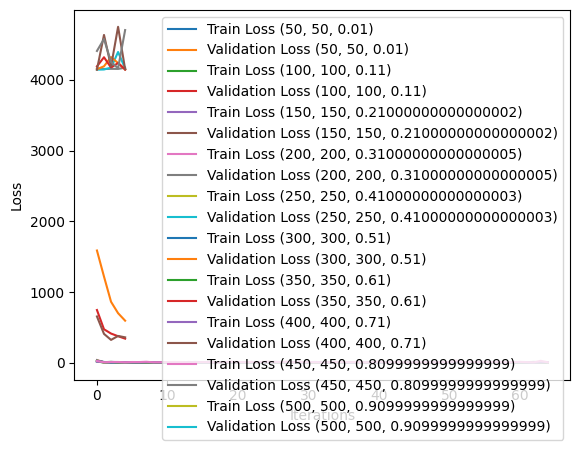

In [21]:
# 增加了超参数的优化
hidden1_num = 50
hidden2_num = 50
lr = 0.01
import matplotlib.pyplot as plt

for i in range(10):
    # 创建网络
    net = ThreeLayerNetwork(input_num=784, hidden1_num=hidden1_num, hidden2_num=hidden2_num, output_num=1)
    
    # 启动训练
    train_losses, valid_losses = net.trainAndvalid(num_epochs=5, batch_size=20, eta=lr)
    
    # 绘制训练损失
    plot_x_train = np.arange(len(train_losses))
    plot_y_train = np.array(train_losses)
    plt.plot(plot_x_train, plot_y_train, label=f'Train Loss ({hidden1_num}, {hidden2_num}, {lr})')

    # 绘制验证损失
    plot_x_valid = np.arange(len(valid_losses))
    plot_y_valid = np.array(valid_losses)
    plt.plot(plot_x_valid, plot_y_valid, label=f'Validation Loss ({hidden1_num}, {hidden2_num}, {lr})')

    hidden1_num += 50
    hidden2_num += 50
    lr += 0.1
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
